Status: Optimal
Optimal number of Product A to produce: 30.0
Optimal number of Product B to produce: 5.0
Maximum Profit: $1350.0


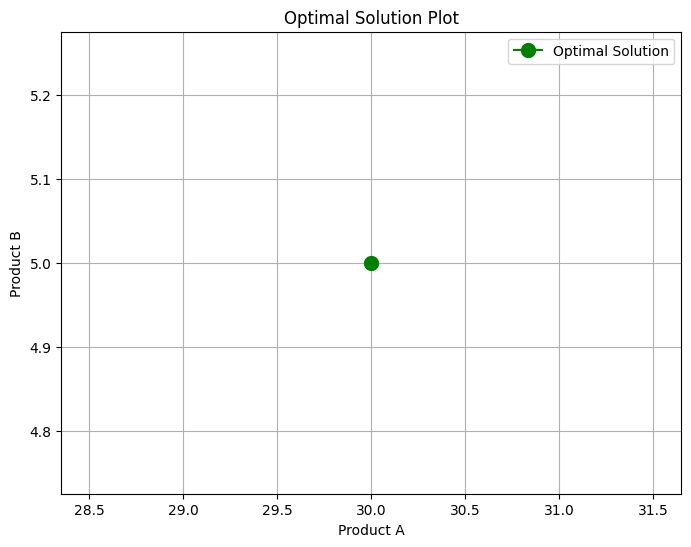


Combined Objective (Profit - Cost):
Status: Unbounded
Optimal Product A: 5.0, Product B: 0.0
Profit: $200.0, Cost: $100.0


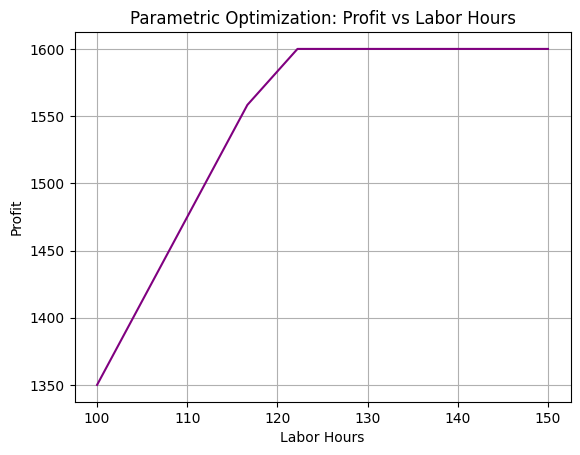

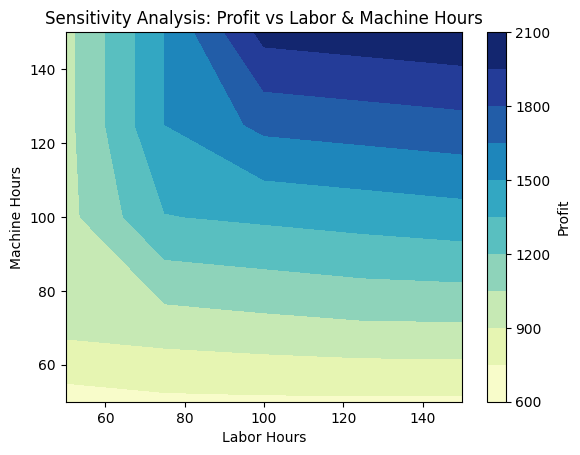


Integer Programming Solution:
Status: Optimal
Optimal number of Product A (Integer): 30.0
Optimal number of Product B (Integer): 5.0
Maximum Profit (Integer): $1350.0


In [1]:
# Notebook to solve the Business Optimization Problem

# --- Step 1: Problem Setup ---

# Importing necessary libraries
from pulp import LpMaximize, LpProblem, LpVariable, LpStatus
import matplotlib.pyplot as plt
import numpy as np

# Define the optimization problem
problem = LpProblem("Maximize_Profit", LpMaximize)

# Define the decision variables
x = LpVariable("Product_A", lowBound=5, cat="Continuous")  # Product A (min 5 units)
y = LpVariable("Product_B", lowBound=0, cat="Continuous")  # Product B

# Define the objective function (Profit Maximization)
problem += 40 * x + 30 * y  # Maximize profit (40 * x + 30 * y)

# Define the constraints
problem += 3 * x + 2 * y <= 100  # Labor hours constraint
problem += 2 * x + 4 * y <= 80   # Machine hours constraint

# Solve the problem
problem.solve()

# Get the results
status = LpStatus[problem.status]
product_a_units = x.varValue
product_b_units = y.varValue
profit = problem.objective.value()

# --- Step 2: Solution ---

# Display results of LP Solution
print(f"Status: {status}")
print(f"Optimal number of Product A to produce: {product_a_units}")
print(f"Optimal number of Product B to produce: {product_b_units}")
print(f"Maximum Profit: ${profit}")

# --- Step 3: Insights ---

# Visualizing the solution
plt.figure(figsize=(8,6))
plt.plot([x.varValue], [y.varValue], marker='o', markersize=10, label="Optimal Solution", color="green")
plt.xlabel("Product A")
plt.ylabel("Product B")
plt.title("Optimal Solution Plot")
plt.legend()
plt.grid(True)
plt.show()

# --- Additional Insights: Multiple Objective Functions ---

# Define a new objective combining profit and cost
cost = 20 * x + 15 * y  # Example cost function
problem_combined = LpProblem("Combined_Objective", LpMaximize)

# New combined objective function (Profit - Cost)
problem_combined += (40 * x + 30 * y) - (20 * x + 15 * y)  # Maximize profit - cost

# Solve the combined problem
problem_combined.solve()

# Get the combined objective results
combined_profit = (40 * x + 30 * y).value()
combined_cost = (20 * x + 15 * y).value()

print("\nCombined Objective (Profit - Cost):")
print(f"Status: {LpStatus[problem_combined.status]}")
print(f"Optimal Product A: {x.varValue}, Product B: {y.varValue}")
print(f"Profit: ${combined_profit}, Cost: ${combined_cost}")

# --- Parametric Optimization: Labor Hours vs Profit ---

# Vary labor hours from 100 to 150 and observe the effect on the optimal solution
labor_hours = np.linspace(100, 150, 10)
profits = []

for hours in labor_hours:
    problem_parametric = LpProblem("Maximize_Profit_Parametric", LpMaximize)
    problem_parametric += 40 * x + 30 * y
    problem_parametric += 3 * x + 2 * y <= hours  # Varying labor hours
    problem_parametric += 2 * x + 4 * y <= 80
    problem_parametric.solve()
    profits.append(problem_parametric.objective.value())

# Plot the parametric results
plt.plot(labor_hours, profits, label="Profit vs Labor Hours", color="purple")
plt.xlabel("Labor Hours")
plt.ylabel("Profit")
plt.title("Parametric Optimization: Profit vs Labor Hours")
plt.grid(True)
plt.show()

# --- Sensitivity Analysis ---

# Vary labor and machine hours to see the effect on profit
hour_ranges = np.linspace(50, 150, 5)
profit_results = []

for labor in hour_ranges:
    for machine in hour_ranges:
        problem_sensitivity = LpProblem("Sensitivity_Analysis", LpMaximize)
        problem_sensitivity += 40 * x + 30 * y
        problem_sensitivity += 3 * x + 2 * y <= labor
        problem_sensitivity += 2 * x + 4 * y <= machine
        problem_sensitivity.solve()
        profit_results.append((labor, machine, problem_sensitivity.objective.value()))

# Plot the sensitivity analysis results
profit_matrix = np.array([result[2] for result in profit_results]).reshape(len(hour_ranges), len(hour_ranges))

plt.contourf(hour_ranges, hour_ranges, profit_matrix, levels=10, cmap="YlGnBu")
plt.colorbar(label="Profit")
plt.xlabel("Labor Hours")
plt.ylabel("Machine Hours")
plt.title("Sensitivity Analysis: Profit vs Labor & Machine Hours")
plt.show()

# --- Integer Programming Solution ---

# If integer values are required for products:
x_int = LpVariable("Product_A", lowBound=5, cat="Integer")  # Product A (Integer)
y_int = LpVariable("Product_B", lowBound=0, cat="Integer")  # Product B (Integer)

# Define the optimization problem with integer variables
problem_int = LpProblem("Maximize_Profit_Integer", LpMaximize)
problem_int += 40 * x_int + 30 * y_int  # Maximize profit

# Define the constraints
problem_int += 3 * x_int + 2 * y_int <= 100  # Labor hours constraint
problem_int += 2 * x_int + 4 * y_int <= 80   # Machine hours constraint

# Solve the problem
problem_int.solve()

# Get the results for Integer Programming
status_int = LpStatus[problem_int.status]
product_a_int_units = x_int.varValue
product_b_int_units = y_int.varValue
profit_int = problem_int.objective.value()

# Display results of Integer Programming Solution
print("\nInteger Programming Solution:")
print(f"Status: {status_int}")
print(f"Optimal number of Product A (Integer): {product_a_int_units}")
print(f"Optimal number of Product B (Integer): {product_b_int_units}")
print(f"Maximum Profit (Integer): ${profit_int}")
